In [4]:
from yahoofinancials import YahooFinancials
from sklearn import preprocessing
import numpy as np
import datetime
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from panel.interact import interact
import panel as pn
from pandas_datareader import data as pdr
import pandas as pd
pn.extension('plotly')
import matplotlib 
%matplotlib inline
import seaborn as sns

In [5]:
start_sp = datetime.datetime(2010, 7, 16)
end_sp = datetime.datetime(2019, 10, 1)

#create dataframes

#SPDR S&P 500 ETF
SPX_df_inception = pdr.get_data_yahoo('SPY', start_sp, end_sp)

#VGT Vanguard Index
VGT_df_inception = pdr.get_data_yahoo('VGT', start_sp, end_sp)

#US Dollar/USDX - Index
USD_df_inception = pdr.get_data_yahoo('DX-Y.NYB', start_sp, end_sp)


In [6]:
SPX_df_inception.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
SPX_df_inception.head()
VGT_df_inception.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
VGT_df_inception.head()
USD_df_inception.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
USD_df_inception.head()

,Close
Date,
2010-07-16,82.489998
2010-07-19,82.510002
2010-07-20,82.750000
2010-07-21,83.389999
2010-07-22,82.599998


In [7]:
SPX_df_inception = SPX_df_inception.rename(columns = {"Close": "SPX Daily Returns"}) 
VGT_df_inception = AGG_df_inception.rename(columns = {"Close": "VGT Daily Returns"})
USD_df_inception = USD_df_inception.rename(columns = {"Close": "USD Daily Returns"}) 


In [9]:
VGT_path = Path("Csvfiles/VGT1.csv")
prices_VGT = pd.read_csv(VGT_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
prices_VGT.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)

In [13]:
combined_df_inception_price = pd.concat([SPX_df_inception, VGT_df_inception, USD_df_inception],axis='columns', join="inner")
combined_daily_return_inception = combined_df_inception_price.pct_change()
combined_daily_return_inception = combined_daily_return_inception.fillna(0, inplace=False)
combined_daily_return_inception.head()

,SPX Daily Returns,High,Low,Open,VGT Daily Returns,Volume,Adj Close,USD Daily Returns
Date,,,,,,,,
2010-07-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-19,0.005907,-0.000186,0.000560,0.000839,-0.000931,0.102305,-0.000931,0.000243
2010-07-20,0.011091,0.000279,-0.000187,0.000186,-0.000745,0.449483,-0.000745,0.002909
2010-07-21,-0.012998,0.002326,0.000187,-0.001304,0.004382,-0.159669,0.004382,0.007734
2010-07-22,0.022322,-0.001114,0.002144,0.003450,-0.000928,0.774691,-0.000928,-0.009474


In [14]:
correlation = combined_daily_return_inception.corr()
correlation

,SPX Daily Returns,High,Low,Open,VGT Daily Returns,Volume,Adj Close,USD Daily Returns
SPX Daily Returns,1.000000,-0.265552,-0.236901,-0.149620,-0.267337,-0.044936,-0.273503,-0.179185
High,-0.265552,1.000000,0.750552,0.762323,0.763116,0.065627,0.726117,-0.082713
Low,-0.236901,0.750552,1.000000,0.763490,0.775051,0.004131,0.727638,-0.070287
Open,-0.149620,0.762323,0.763490,1.000000,0.466303,0.005774,0.418487,-0.042087
VGT Daily Returns,-0.267337,0.763116,0.775051,0.466303,1.000000,0.042492,0.970937,-0.116482
Volume,-0.044936,0.065627,0.004131,0.005774,0.042492,1.000000,0.035596,-0.025132
Adj Close,-0.273503,0.726117,0.727638,0.418487,0.970937,0.035596,1.000000,-0.122638
USD Daily Returns,-0.179185,-0.082713,-0.070287,-0.042087,-0.116482,-0.025132,-0.122638,1.000000


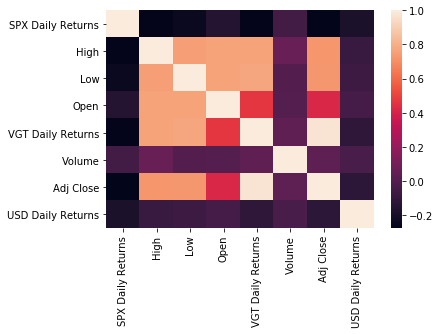

In [15]:
sns.heatmap(correlation)


In [33]:
def price_chart_daily_returns():
    VGT_path = Path("CsvFiles/VGT1.csv")
    VGT_df = pd.read_csv(VGT_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
    VGT_close = VGT_df["Close"].pct_change()
    price_chart_fig = plt.figure()
    price_chart = VGT_close.hist(bins=150, density=True, histtype="stepfilled", alpha=.5)
    plt.title("Histogram of VGT Daily Returns", weight="bold")
    plt.xlabel("Daily Returns")
    plt.ylabel("Frequency")
    plt.yticks(range(0, 16))
    plt.xlim(xmin=-0.35, xmax = 0.45)
    plt.close(price_chart_fig)
    
    return pn.pane.Matplotlib(price_chart_fig)

In [34]:
def choose_timeframe(year):
    
    
    return prices_VGT.loc[prices_VGT.index.year==year,:].hvplot.line()

timeframe = prices_VGT.index.year.unique()

interact(choose_timeframe, year=timeframe)

Column
    [0] Column
        [0] DiscreteSlider(formatter='%d', name='year', options=[2018, 2019, 2020, 2021], value=2018)
    [1] Row
        [0] HoloViews(Curve, name='interactive02606')

In [35]:
def correlation_matrix():
    
    start_sp = datetime.datetime(2010, 7, 16)
    end_sp = datetime.datetime(2019, 10, 1)
    #SPDR S&P 500 ETF
    SPX_df_inception = pdr.get_data_yahoo('SPY', start_sp, end_sp)

    #iShares Core U.S. Aggregate Bond ETF
    VGT_df_inception = pdr.get_data_yahoo('AGG', start_sp, end_sp)

    #US Dollar/USDX - Index
    USD_df_inception = pdr.get_data_yahoo('DX-Y.NYB', start_sp, end_sp)


    
    SPX_df_inception.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
    VGT_df_inception.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
    USD_df_inception.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
    
    SPX_df_inception = SPX_df_inception.rename(columns = {"Close": "SPX Daily Returns"}) 
    VGT_df_inception = AGG_df_inception.rename(columns = {"Close": "AGG Daily Returns"})
    USD_df_inception = USD_df_inception.rename(columns = {"Close": "USD Daily Returns"}) 

    
    VGT_path = Path("CsvFiles/VGT1.csv")
    prices_VGT = pd.read_csv(VGT_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
    prices_VGT.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
    prices_VGT = prices_VGT.rename(columns = {"Close": "VGT Daily Returns"})
    
    combined_df_inception_price = pd.concat([prices_VGT, SPX_df_inception, VGT_df_inception, USD_df_inception],axis='columns', join="inner")
    combined_daily_return_inception = combined_df_inception_price.pct_change()
    correlation = combined_daily_return_inception.corr()
    
    return (correlation)

In [39]:
title = '#VGT Price Chart Since Inception, By Year'
subtitle = "VGT reached a record high on December 12 2016 and the S&P500 reached its most recent record high on July 26 2019"
commentary_daily_returns = 'Based on the visual, VGT appears to follow a normal distribution of returns'
commentary_correlation = 'VGT, since inception, has shown a very high correlaton to the SPDR S&P 500 ETF, Shares Core U.S. Aggregate Bond ETF,US Dollar/USDX - Index, Bloomberg Commodity Index, SPDR Gold Shares'

price_tab_interactive = pn.Row(pn.Column(title, subtitle), interact(choose_timeframe, year=timeframe))

price_chart_inception = pn.Column(commentary_daily_returns, price_chart_daily_returns())

corr = pn.Column(commentary, correlation_matrix(), correlation_heat_map() )

# Create tabs
VGT_dashboard = pn.Tabs(("Interactive Price Chart", price_tab_interactive), ("VGT Daily Returns", price_chart_inception), ("Correlation Matrix", corr))

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


NameError: name 'commentary' is not defined

In [38]:
VGT_dashboard

NameError: name 'VGT_dashboard' is not defined